In [591]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from datetime import timezone
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import f1_score
from scipy import stats
from sklearn.model_selection import GridSearchCV

In [592]:
#Loading in DataFrame
df = pd.read_csv("insurance_claims.csv")

In [593]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [594]:
#Easy fix changed all Y and N to 1 and 0
df.property_damage = df.property_damage.map({'YES': 1, 'NO' : 0})
df.police_report_available = df.police_report_available.map({'YES': 1, 'NO' : 0})
df.fraud_reported = df.fraud_reported.map({'Y': 1, 'N' : 0})
#Found all instances of ? and replaced with NaN
df = df.replace('?',np.NaN)

In [595]:
#For the two columns where I replaced Y and N w 1 and 0 I filled all the NaN values with the median value which is 0
df.property_damage = df.property_damage.fillna(df.property_damage.median())
df.police_report_available = df.police_report_available.fillna(df.police_report_available.median())

In [596]:
#Sorted dataframe by loyalty of customer for myself
df = df.sort_values(['months_as_customer', 'age'])

In [597]:
df = df.reset_index().drop(columns = ['index'])

In [598]:
#There were only a few rows which had empty cells for this column so decided to drop all the empty rows
df = df.dropna(subset = ['collision_type'])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,32,740518,18-02-2011,OH,500/1000,1000,1377.04,0,441363,...,1,0.0,39720,6620,6620,26480,Accura,MDX,2002,0
1,1,29,357949,24-05-2006,OH,500/1000,500,854.58,0,612826,...,3,1.0,86790,7890,23670,55230,Honda,CRV,2003,0
2,1,33,162004,19-09-1995,IL,250/500,500,903.32,0,451184,...,0,0.0,31700,6340,3170,22190,Toyota,Highlander,2006,0
3,1,33,388616,06-12-1995,OH,250/500,2000,1391.63,0,466390,...,3,0.0,69400,6940,6940,55520,Mercedes,C300,2000,0
4,2,20,480094,09-03-2003,IN,500/1000,1000,1189.98,4000000,613327,...,3,1.0,48360,4030,8060,36270,Audi,A5,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,475,61,607974,12-08-2004,IL,500/1000,500,1265.72,0,612506,...,2,0.0,64350,9900,9900,44550,Mercedes,E400,1998,0
995,476,61,865607,18-04-1993,IN,250/500,1000,1562.80,0,458997,...,2,1.0,49390,8980,4490,35920,Suburu,Legacy,2009,0
997,478,64,346002,20-08-1990,OH,250/500,500,835.02,0,602433,...,1,0.0,33930,0,3770,30160,BMW,X6,1998,0
998,479,60,232854,07-07-1997,IL,100/300,2000,1304.83,0,473638,...,0,0.0,60600,5050,10100,45450,Honda,Civic,2001,0


In [599]:
df.authorities_contacted = df.authorities_contacted.fillna(0)

In [600]:
df = df.reset_index().drop(columns = ['index'])
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0,32,740518,18-02-2011,OH,500/1000,1000,1377.04,0,441363,...,1,0.0,39720,6620,6620,26480,Accura,MDX,2002,0
1,1,29,357949,24-05-2006,OH,500/1000,500,854.58,0,612826,...,3,1.0,86790,7890,23670,55230,Honda,CRV,2003,0
2,1,33,162004,19-09-1995,IL,250/500,500,903.32,0,451184,...,0,0.0,31700,6340,3170,22190,Toyota,Highlander,2006,0
3,1,33,388616,06-12-1995,OH,250/500,2000,1391.63,0,466390,...,3,0.0,69400,6940,6940,55520,Mercedes,C300,2000,0
4,2,20,480094,09-03-2003,IN,500/1000,1000,1189.98,4000000,613327,...,3,1.0,48360,4030,8060,36270,Audi,A5,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,475,61,607974,12-08-2004,IL,500/1000,500,1265.72,0,612506,...,2,0.0,64350,9900,9900,44550,Mercedes,E400,1998,0
818,476,61,865607,18-04-1993,IN,250/500,1000,1562.80,0,458997,...,2,1.0,49390,8980,4490,35920,Suburu,Legacy,2009,0
819,478,64,346002,20-08-1990,OH,250/500,500,835.02,0,602433,...,1,0.0,33930,0,3770,30160,BMW,X6,1998,0
820,479,60,232854,07-07-1997,IL,100/300,2000,1304.83,0,473638,...,0,0.0,60600,5050,10100,45450,Honda,Civic,2001,0


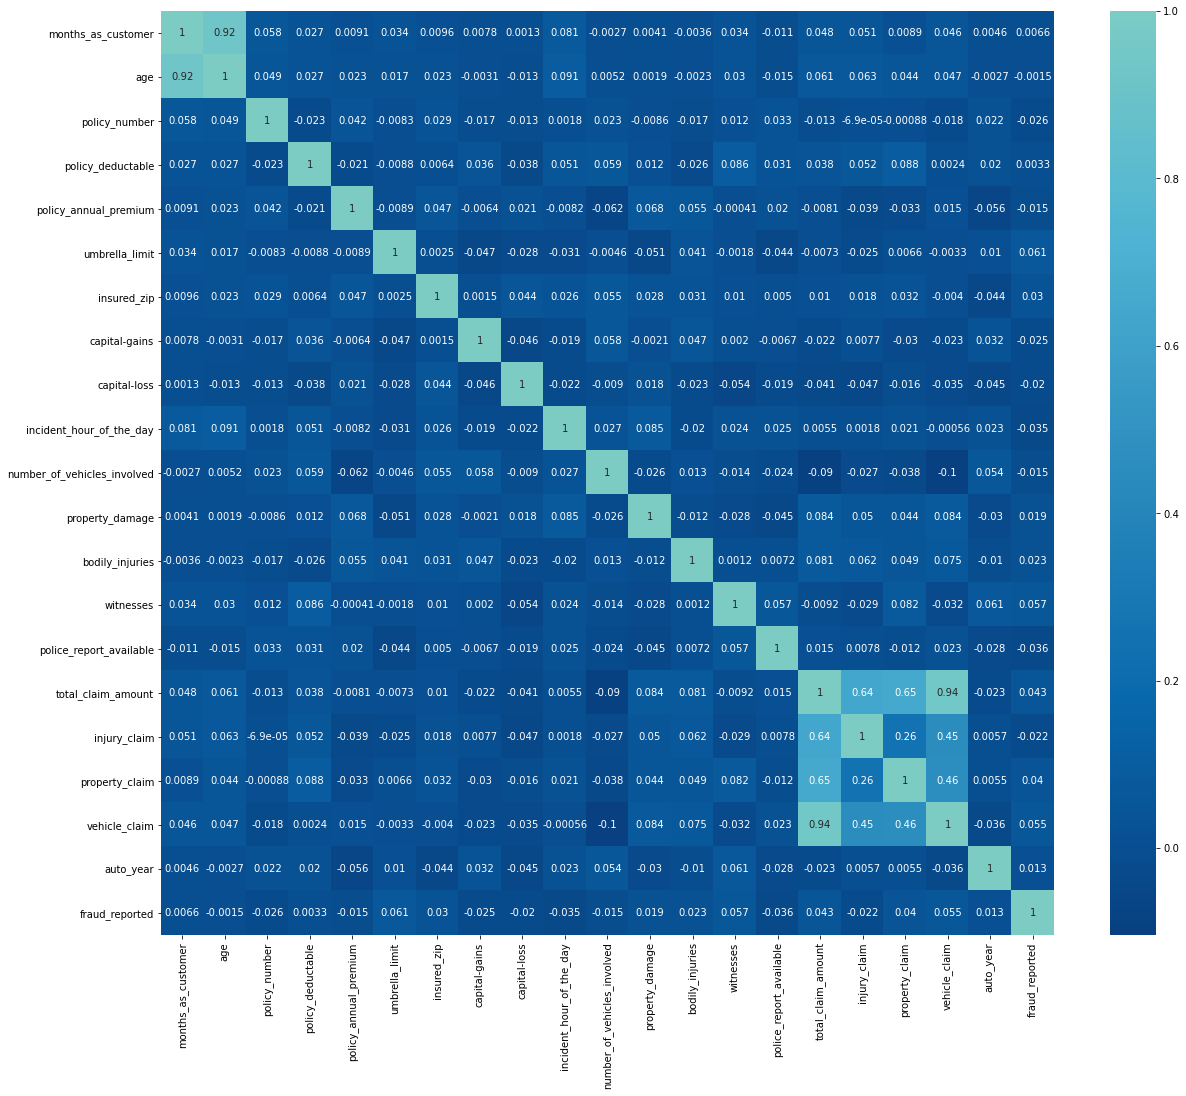

In [601]:
#Showed all correlations to identify which features had a poor correlation with the target variable
corr = df.corr()
fig = plt.figure(figsize=(20, 17))
sns.heatmap(corr, annot=True, cmap='GnBu_r', center=1)

In [602]:
df_new = df.drop(columns = ['age', 'policy_number', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'police_report_available', 'injury_claim'])
#dropped these features and made a new dataframe

In [603]:
df_new.columns
#Presented the features of the new dataframe

Index(['months_as_customer', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'bodily_injuries', 'witnesses', 'total_claim_amount',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [604]:
#Split the features into categorical and numerical features in two 2D arrays
columns = list(df_new.columns)
numeric = []
categorical = []
for col in columns:
    if df_new[col].values.dtype in ['float64', 'int64']:
        numeric.append(col)
    else:
        categorical.append(col)

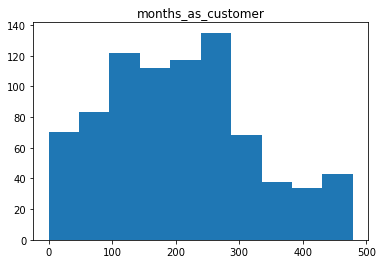

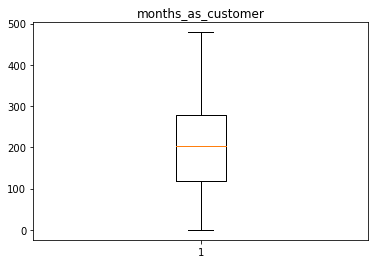

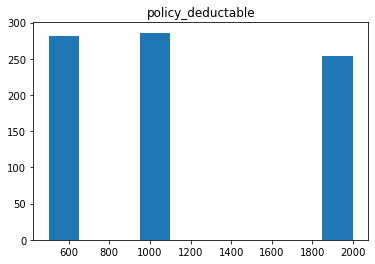

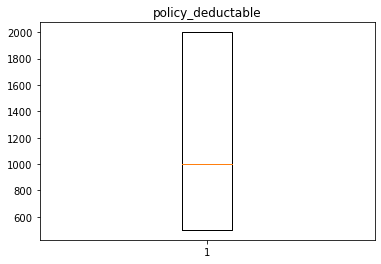

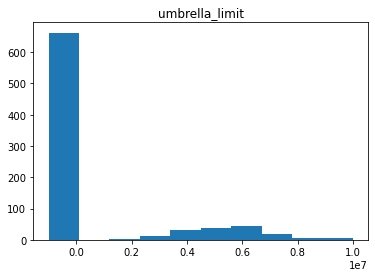

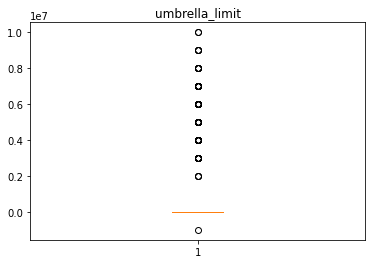

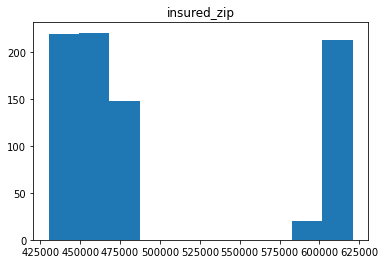

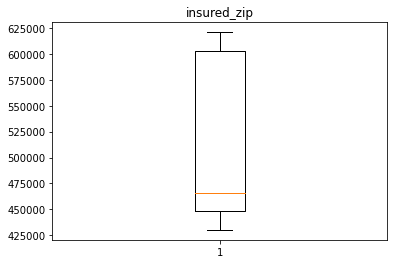

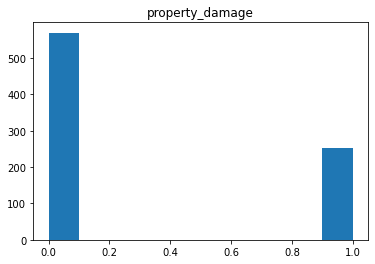

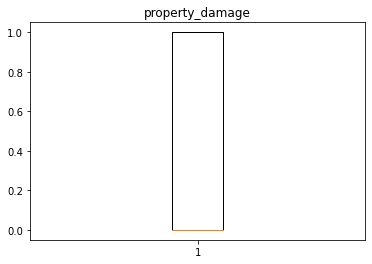

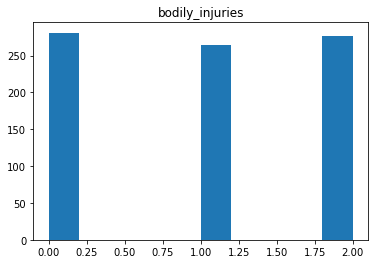

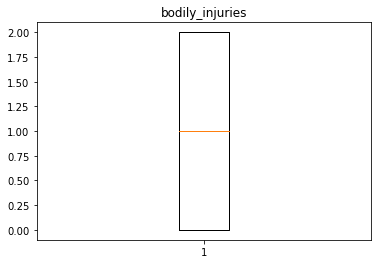

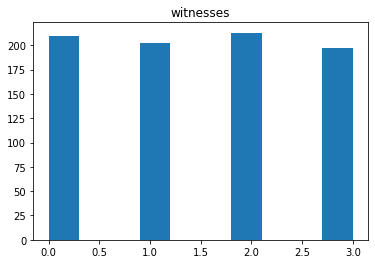

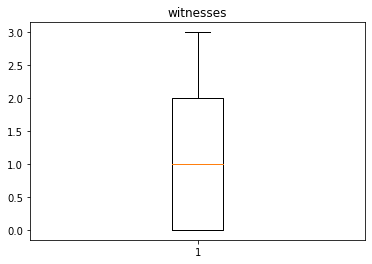

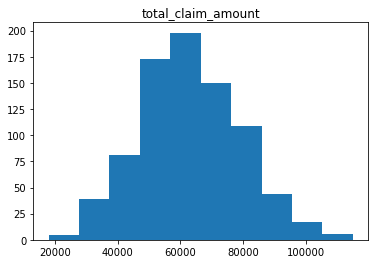

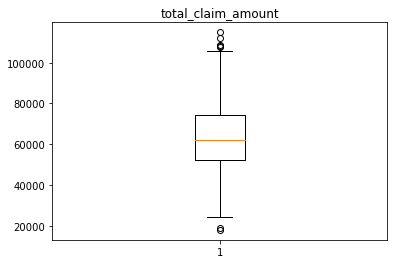

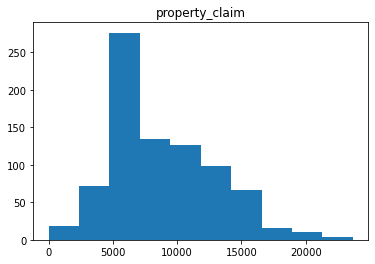

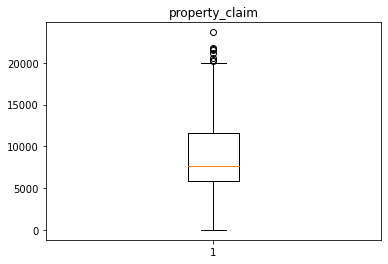

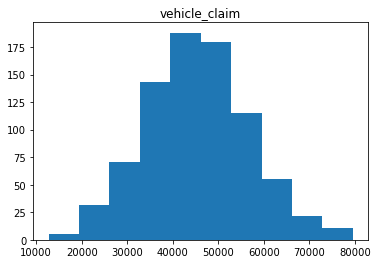

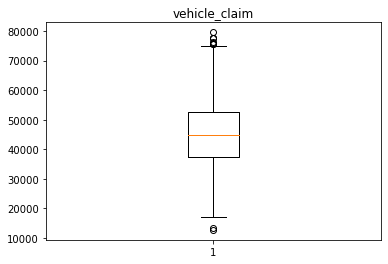

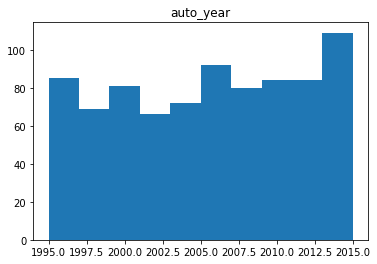

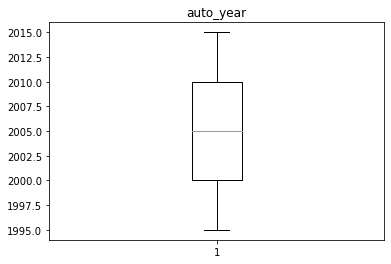

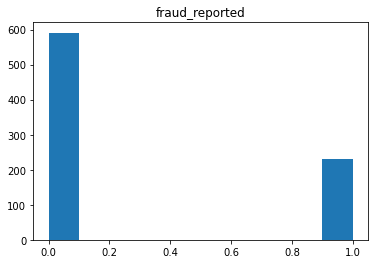

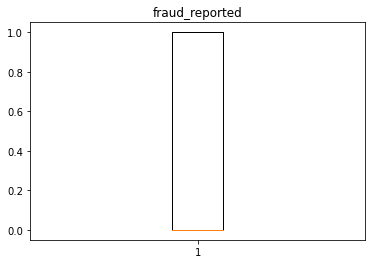

In [605]:
#For every numerical feature I plotted a histogram to present the distribution of the data and a boxplot to show outliers and variance
for i in numeric:
    plt.hist(df_new[i])
    plt.title(i)
    plt.show()
    plt.boxplot(df_new[i])
    plt.title(i)
    plt.show()

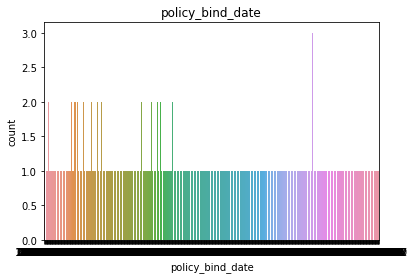

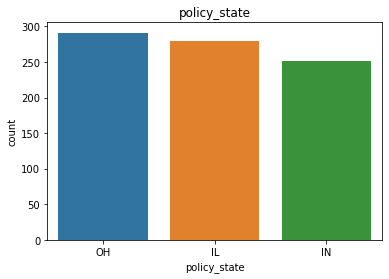

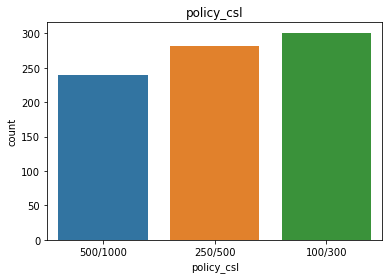

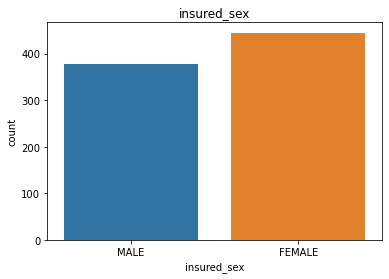

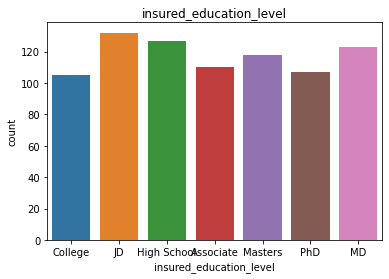

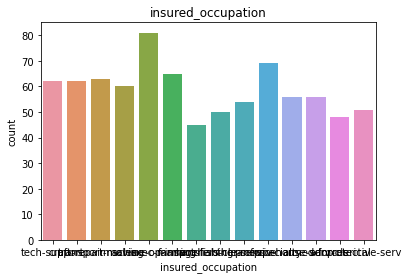

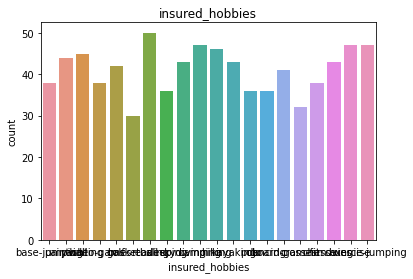

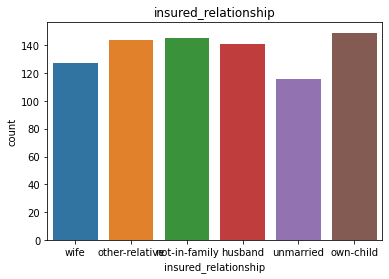

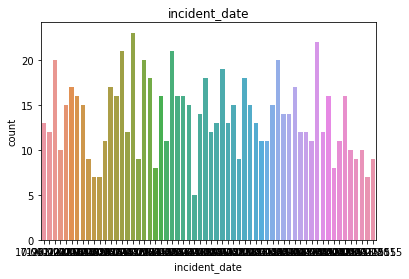

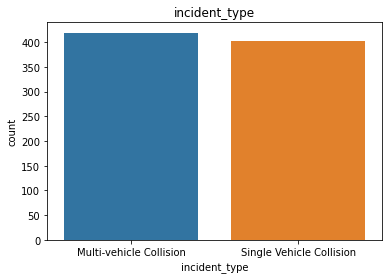

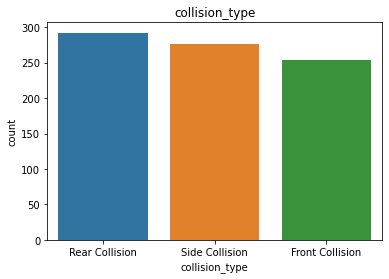

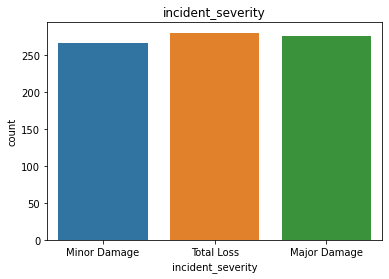

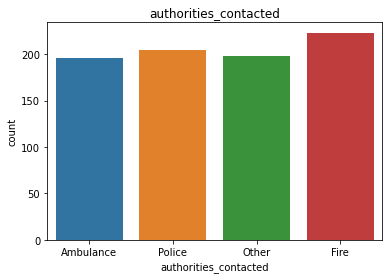

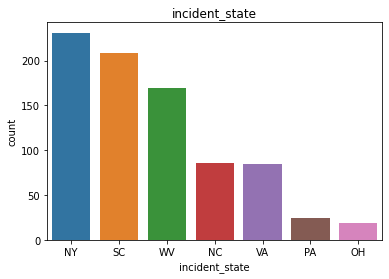

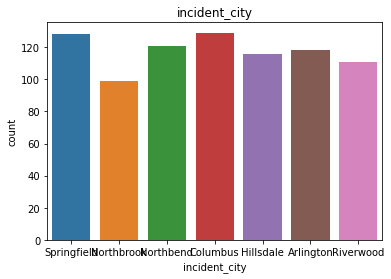

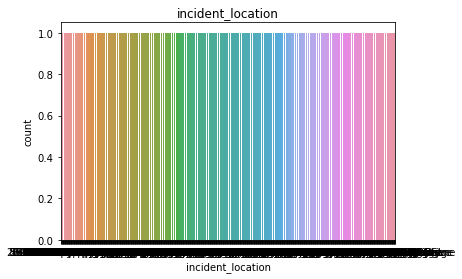

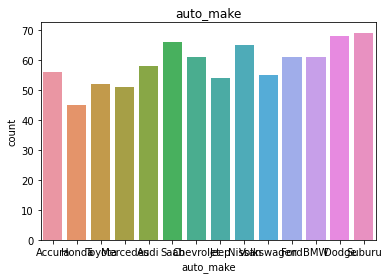

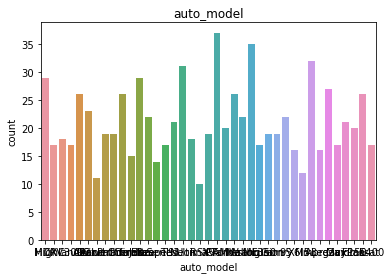

In [606]:
#For every categorical feature I plotted a countplot to present the distribution of the data and to identify outliers
for i in categorical:
    sns.countplot(df_new[i])
    plt.title(i)
    plt.show()

In [607]:
#Outlier detection and removal by z score
df_new = df_new[(np.abs(stats.zscore(df_new.property_claim)) < 3)].reset_index().drop(columns = ['index'])

In [608]:
#Outlier detection and removal by z score
df_new = df_new[(np.abs(stats.zscore(df_new.vehicle_claim)) < 3)].reset_index().drop(columns = ['index'])

In [609]:
#Outlier detection and removal by z score
df_new = df_new[(np.abs(stats.zscore(df_new.total_claim_amount)) < 3)].reset_index().drop(columns = ['index'])

In [612]:
#Converted all categorical variables into OHEs
polstate = pd.get_dummies(df_new.policy_state)
df_new = pd.concat([df_new, polstate], axis = 'columns')
df_new = df_new.drop(columns = ['policy_state'])

polcsl = pd.get_dummies(df_new.policy_csl)
df_new = pd.concat([df_new, polcsl], axis = 'columns')
df_new = df_new.drop(columns = ['policy_csl'])

sex = pd.get_dummies(df_new.insured_sex)
df_new = pd.concat([df_new, sex], axis = 'columns')
df_new = df_new.drop(columns = ['insured_sex'])

ed = pd.get_dummies(df_new.insured_education_level)
df_new = pd.concat([df_new, ed], axis = 'columns')
df_new = df_new.drop(columns = ['insured_education_level'])

occ = pd.get_dummies(df_new.insured_occupation)
df_new = pd.concat([df_new, occ], axis = 'columns')
df_new = df_new.drop(columns = ['insured_occupation'])

hobby = pd.get_dummies(df_new.insured_hobbies)
df_new = pd.concat([df_new, hobby], axis = 'columns')
df_new = df_new.drop(columns = ['insured_hobbies'])

relationship = pd.get_dummies(df_new.insured_relationship)
df_new = pd.concat([df_new, relationship], axis = 'columns')
df_new = df_new.drop(columns = ['insured_relationship'])

incidtype = pd.get_dummies(df_new.incident_type)
df_new = pd.concat([df_new, incidtype], axis = 'columns')
df_new = df_new.drop(columns = ['incident_type'])

incidsev = pd.get_dummies(df_new.incident_severity)
df_new = pd.concat([df_new, incidsev], axis = 'columns')
df_new = df_new.drop(columns = ['incident_severity'])

coll = pd.get_dummies(df_new.collision_type)
df_new = pd.concat([df_new, coll], axis = 'columns')
df_new = df_new.drop(columns = ['collision_type'])

auth = pd.get_dummies(df_new.authorities_contacted)
df_new = pd.concat([df_new, auth], axis = 'columns')
df_new = df_new.drop(columns = ['authorities_contacted'])

incstate = pd.get_dummies(df_new.incident_state)
df_new = pd.concat([df_new, incstate], axis = 'columns')
df_new = df_new.drop(columns = ['incident_state'])

inccity = pd.get_dummies(df_new.incident_city)
df_new = pd.concat([df_new, inccity], axis = 'columns')
df_new = df_new.drop(columns = ['incident_city'])

automake = pd.get_dummies(df_new.auto_make)
df_new = pd.concat([df_new, automake], axis = 'columns')
df_new = df_new.drop(columns = ['auto_make'])

In [613]:
#Dropped all columns w poor correlation to the target variable
df_new = df_new.drop(columns = ['IL', 'FEMALE', 'High School', 'Masters', 'adm-clerical', 'armed-forces', 'handlers-cleaners', 'machine-op-inspct', 'other-service', 'priv-house-serv', 'prof-specialty', 'protective-serv',
                               'basketball', 'bungie-jumping', 'camping', 'dancing', 'exercise', 'golf', 'hiking', 'kayaking', 'movies', 'paintball', 'skydiving', 'sleeping', 'video-games','husband', 'own-child',
                               'unmarried', 'Multi-vehicle Collision', 'Front Collision', 'Side Collision', 'Fire', 'Police', 'NY', 'PA', 'VA', 'WV', 'Hillsdale', 'Northbend', 'Northbrook', 'Riverwood', 'Springfield',
                               'Accura', 'Dodge', 'Jeep', 'Nissan', 'Saab', 'Suburu', 'Toyota', '100/300', '500/1000', 'Minor Damage', 'Total Loss'])


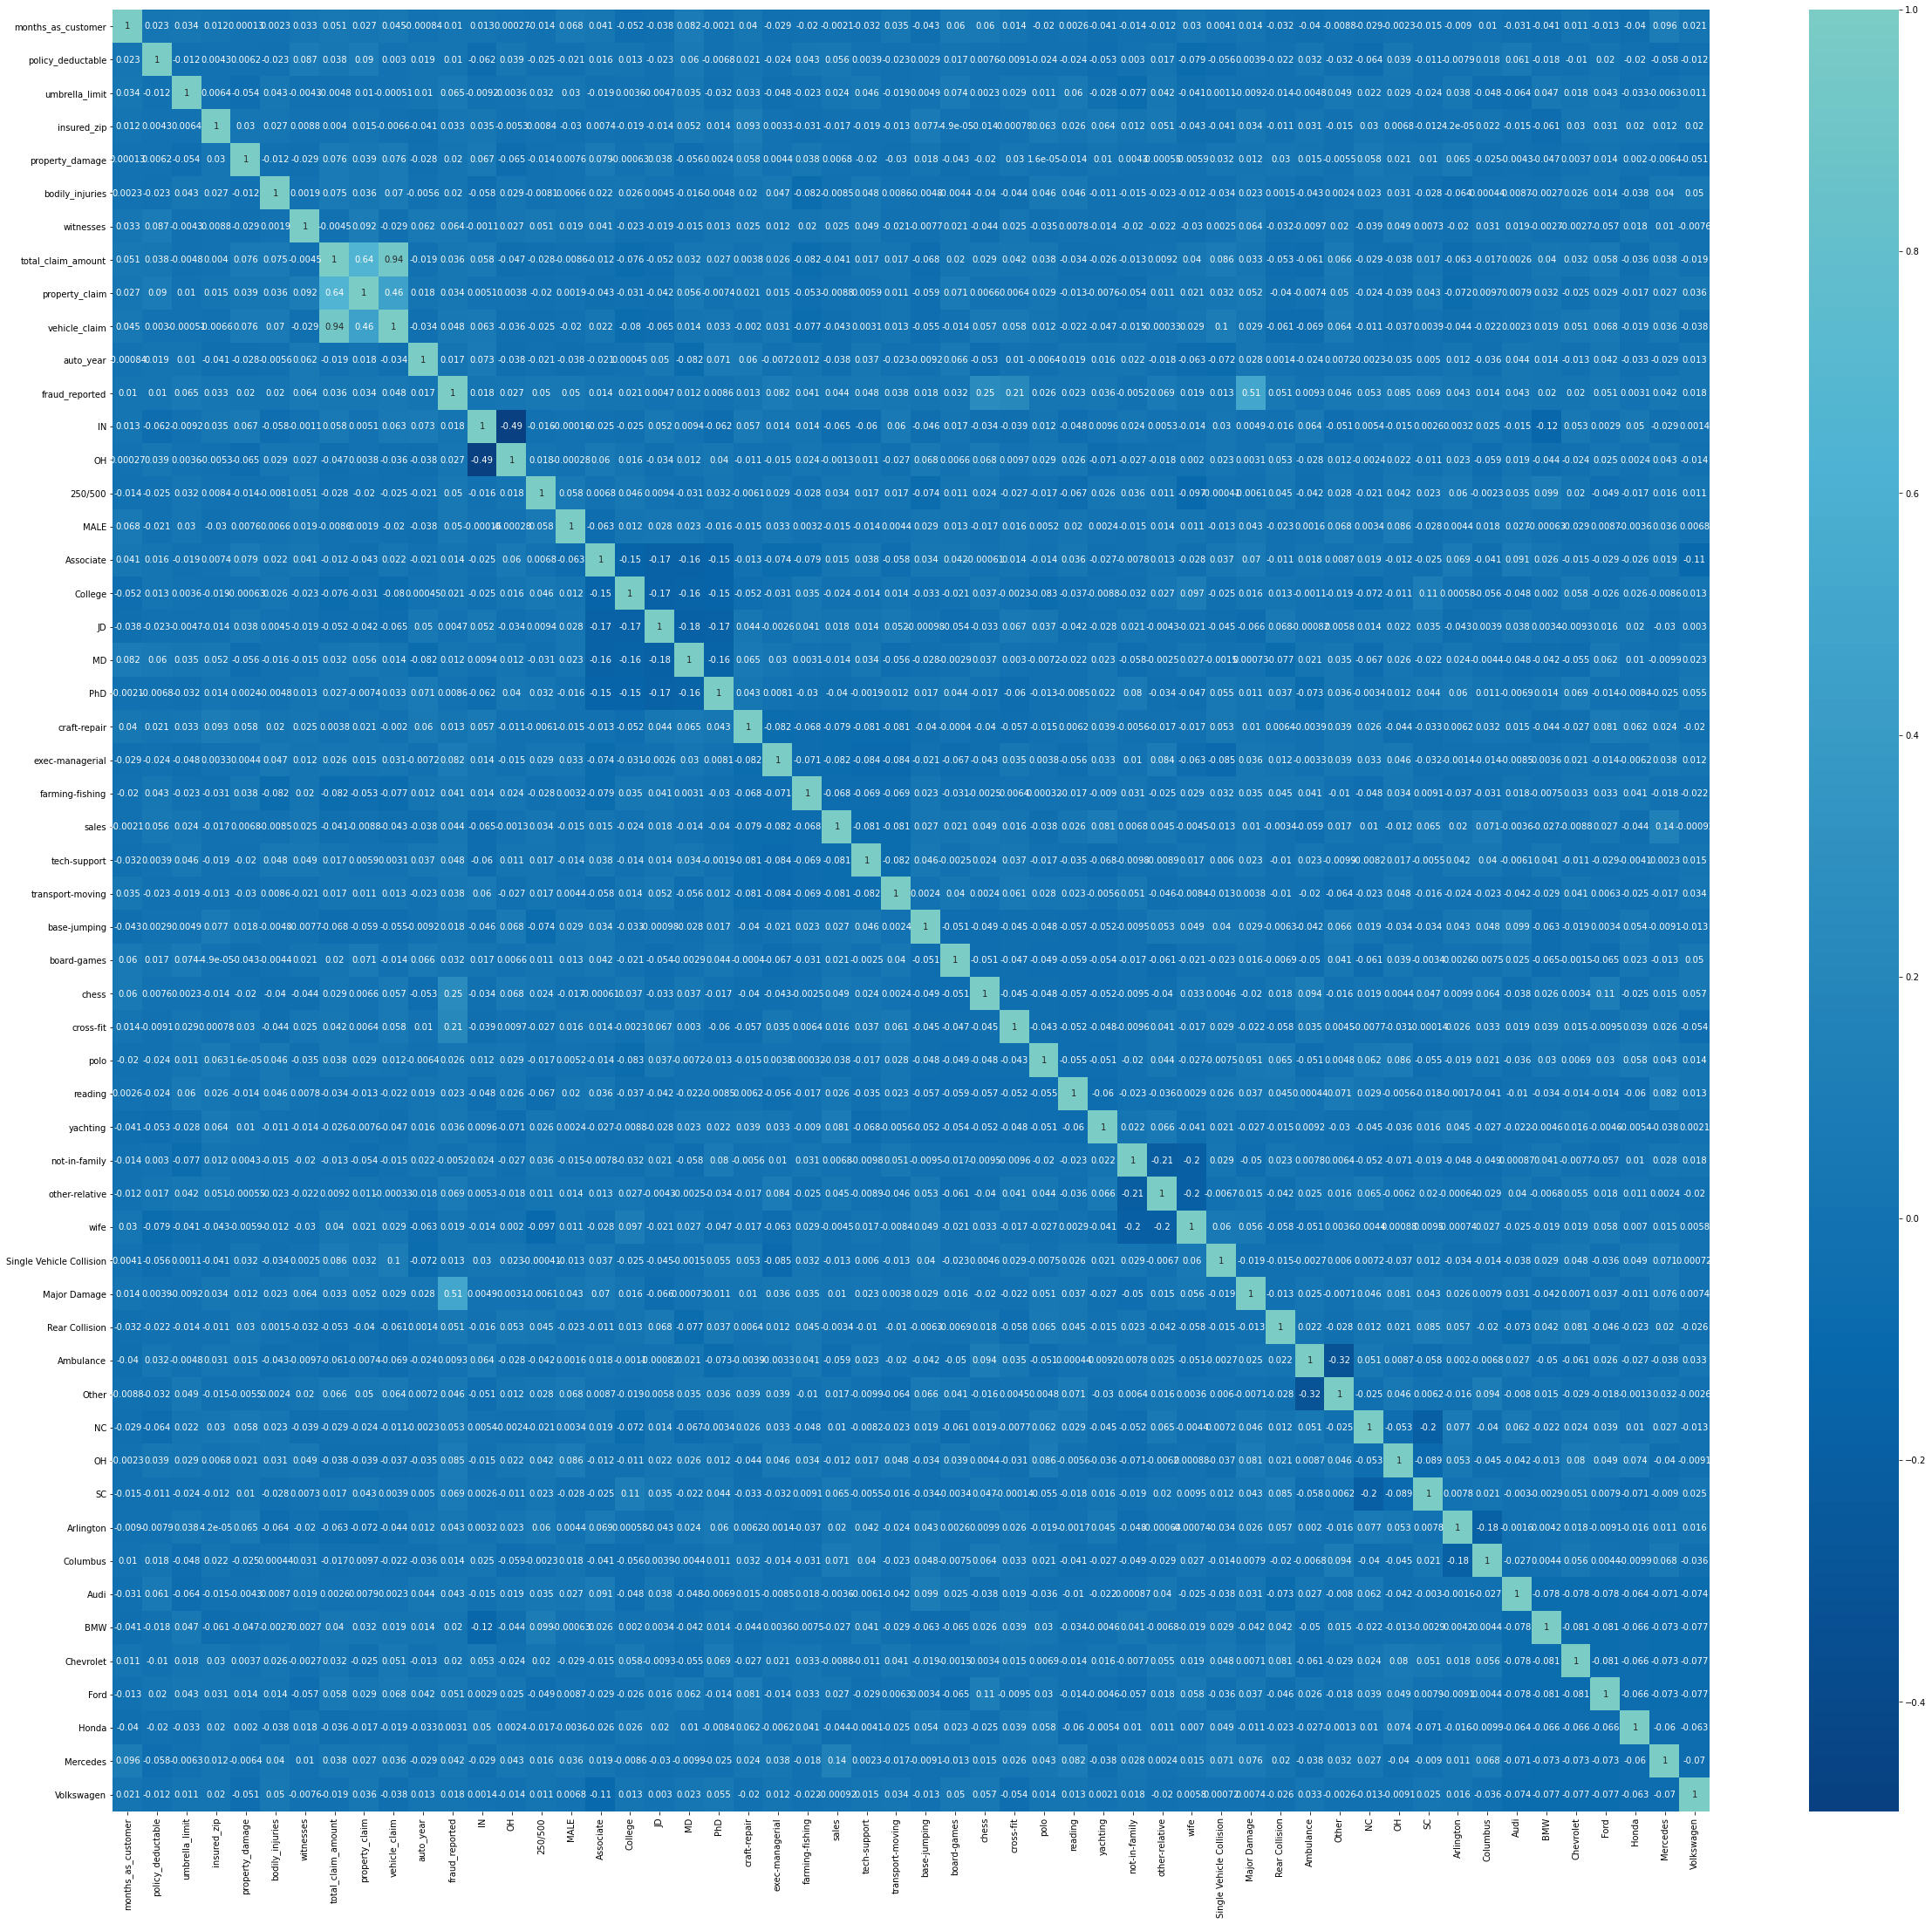

In [614]:
corr = df_new.corr()
fig = plt.figure(figsize=(41, 38))
sns.heatmap(corr, annot=True, cmap='GnBu_r', center=1)

In [615]:
df_new.describe()

,months_as_customer,policy_deductable,umbrella_limit,insured_zip,property_damage,bodily_injuries,witnesses,total_claim_amount,property_claim,vehicle_claim,...,SC,Arlington,Columbus,Audi,BMW,Chevrolet,Ford,Honda,Mercedes,Volkswagen
count,815.000000,815.000000,8.150000e+02,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,206.852761,1136.809816,1.055215e+06,499234.397546,0.305521,0.991411,1.485890,62746.110429,8736.858896,45154.957055,...,0.250307,0.142331,0.158282,0.069939,0.074847,0.074847,0.074847,0.051534,0.062577,0.067485
std,116.267538,612.618845,2.250994e+06,70907.475313,0.460911,0.825678,1.113678,15731.969242,3940.785564,11187.200675,...,0.433456,0.349604,0.365230,0.255200,0.263305,0.263305,0.263305,0.221219,0.242349,0.251014
min,0.000000,500.000000,-1.000000e+06,430141.000000,0.000000,0.000000,0.000000,18000.000000,0.000000,12720.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,500.000000,0.000000e+00,447977.500000,0.000000,0.000000,0.000000,52225.000000,5850.000000,37410.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,204.000000,1000.000000,0.000000e+00,465942.000000,0.000000,1.000000,1.000000,61740.000000,7560.000000,44800.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,279.500000,2000.000000,0.000000e+00,602409.000000,1.000000,2.000000,2.000000,73860.000000,11570.000000,52390.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,479.000000,2000.000000,1.000000e+07,620962.000000,1.000000,2.000000,3.000000,108480.000000,20550.000000,77670.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [616]:
#Converted all categorical date values into datetime objects so it can be used with the model
df_new['policy_bind_date'] = pd.to_datetime(df_new['policy_bind_date'], errors = 'coerce')
df_new['incident_date'] = pd.to_datetime(df_new['incident_date'], errors = 'coerce')
df_new['incident_month'] = df_new['incident_date'].dt.month
df_new['incident_day'] = df_new['incident_date'].dt.day
df_new['policy_bind_month'] = df_new['policy_bind_date'].dt.month
df_new['policy_bind_day'] = df_new['policy_bind_date'].dt.day

In [617]:
#Split the data into a target column and the rest of the data without the target column
df_y = df_new.fraud_reported
df_X = df_new.drop(columns = ['fraud_reported'])

In [618]:
#Made training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=42)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test.fillna(0, inplace=True)

In [619]:
#Training the training data through a LogisticRegression pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [620]:
pipe.score(X_test, y_test)

0.803921568627451

In [621]:
#tried GridSearch
#best model
#used hyperparameter tuning and 10 fold cross validation to see if score can be imroved
clf1 = GridSearchCV(LogisticRegression(), {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial']
}, cv = 10, return_train_score = False)

clf1.fit(X_train, y_train)

/Users/sidgog/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sidgog/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sidgog/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/sidgog/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [622]:
#best score
#imrovement but only by 0.003
clf1.best_score_

0.806927551560021

In [623]:
#showed the best hyperparameters to be used
clf1.best_params_

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}